In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import datetime
import shutil

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample = pd.read_csv('./data/sample_submission.csv')

In [3]:
no_need_idx = train.nunique()[train.nunique() == 1].index
train.drop(no_need_idx,axis=1,inplace=True)
test.drop(no_need_idx,axis=1,inplace=True)

In [4]:
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


/Users/estyle-092/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


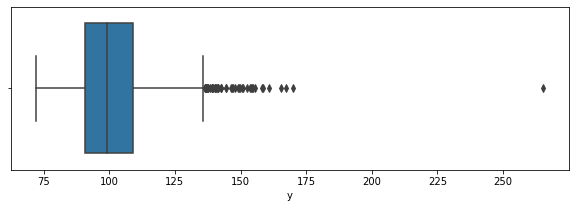

In [6]:
fig,ax = plt.subplots(figsize=(10,3))
sns.boxplot(train['y'])
plt.show()

In [7]:
train[train['y']>250]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.drop(883,inplace=True)

In [9]:
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.reset_index(inplace=True)

In [11]:
train.drop('index',axis=1,inplace=True)

In [12]:
train['y'].sort_values(ascending=False).head(20)

342     169.91
1458    167.45
3132    165.52
1202    160.87
888     158.53
2734    158.23
3743    155.62
429     154.87
1059    154.43
2239    154.16
2735    153.51
1268    152.32
1204    150.89
253     150.43
1140    149.63
4175    149.52
2375    148.94
681     147.72
2904    147.22
216     146.83
Name: y, dtype: float64

In [13]:
sample

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318
...,...,...
4204,8410,100.669318
4205,8411,100.669318
4206,8413,100.669318
4207,8414,100.669318


In [14]:
int_idx = train.dtypes[train.dtypes == 'int64'].index.drop('ID')

In [15]:
obj_idx = train.dtypes[train.dtypes != 'int64'].index.drop('y')

In [16]:
train.loc[:,obj_idx]

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4203,ak,s,as,c,d,aa,d,q
4204,j,o,t,d,d,aa,h,h
4205,ak,v,r,a,d,aa,g,e
4206,al,r,e,f,d,aa,l,u


In [17]:
test.loc[:,obj_idx]

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [18]:
df_obj = pd.concat([train.loc[:,obj_idx],test.loc[:,obj_idx]])

In [19]:
train.loc[:,obj_idx].nunique().sum()

195

In [20]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_encoded = encoder.fit_transform(train.loc[:,obj_idx])
X_encoded = pd.DataFrame(X_encoded,columns=encoder.get_feature_names_out())
X_test_encoded = encoder.transform(test.loc[:,obj_idx])
X_test_encoded = pd.DataFrame(X_test_encoded,columns=encoder.get_feature_names_out())

モデルの構築

In [21]:
X = pd.concat([train.loc[:,int_idx],X_encoded],axis=1)
y = train['y']
X_test = pd.concat([test.loc[:,int_idx],X_test_encoded],axis=1)

In [22]:
X.shape

(4208, 551)

In [23]:
#nrows=56
#ncols=10

#fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(5*ncols,10*nrows))
#for i,column in enumerate(X.columns):
    #sns.boxplot(data=pd.concat([X[column],y],axis=1),x=column,y=y,ax=ax[i//10,i%10])
    #ax[i//10,i%10].set_title(column)
#plt.savefig('boxplot.png')

In [24]:
def is_separate(column):
    df_whole = pd.concat([X,y],axis=1)
    df_part = df_whole[[column,'y']]
    df_part_0 = df_part.loc[df_part[column]==0,:]
    df_part_1 = df_part.loc[df_part[column]==1,:]
    q1_df_part_0 = df_part_0['y'].quantile(q=0.25)
    q3_df_part_0 = df_part_0['y'].quantile(q=0.75)
    q1_df_part_1 = df_part_1['y'].quantile(q=0.25)
    q3_df_part_1 = df_part_1['y'].quantile(q=0.75)
    #print([q1_df_part_0,q3_df_part_0,q1_df_part_1,q3_df_part_1])
    if q3_df_part_0 < q1_df_part_1 or q3_df_part_1 < q1_df_part_0:
        return True
    else:
        return False

X_columns_se = pd.Series(X.columns)
separate_idx = X_columns_se[X_columns_se.apply(is_separate)].index.tolist()

In [25]:
X = X.iloc[:,separate_idx]
X_test = X_test.iloc[:,separate_idx]

テストデータの予測

In [26]:
seed=0
kf = KFold(n_splits=5,shuffle=True,random_state=seed)

model_list = []

for train_idx,valid_idx in kf.split(X,y):
    X_train,X_valid = X.iloc[train_idx,:],X.iloc[valid_idx,:]
    y_train,y_valid = y[train_idx],y[valid_idx]
    model = Lasso(alpha=0.5)
    model.fit(X_train,y_train)
    model_list.append(model)

In [27]:
df_coef = pd.DataFrame()
for i,model in enumerate(model_list):
    se_coef = pd.Series(model.coef_,name=f'model_{i}')
    df_coef = pd.concat([df_coef,se_coef],axis=1)
df_coef.to_csv('df_coef.csv')

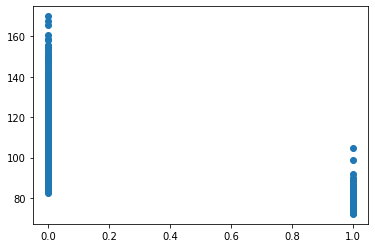

In [28]:
fig,ax = plt.subplots()
ax.scatter(X.iloc[:,3],y)
plt.show()

In [29]:
y_test_df = pd.DataFrame()

for i,model in enumerate(model_list):
    y_test = model.predict(X_test)
    y_test = pd.Series(y_test,name=f'model_{i}')
    y_test_df = pd.concat([y_test_df,y_test],axis=1)

y_test_df['mean'] = y_test_df.apply(np.mean,axis=1)
y_test_df

,model_0,model_1,model_2,model_3,model_4,mean
0,89.116972,89.538379,89.417699,90.370608,89.565591,89.601850
1,95.010860,94.938008,95.096954,95.048485,95.205318,95.059925
2,89.116972,89.538379,89.417699,90.370608,89.565591,89.601850
3,89.116972,89.538379,89.417699,90.370608,89.565591,89.601850
4,108.460337,108.272442,108.509068,108.256232,108.133725,108.326361
...,...,...,...,...,...,...
4204,108.460337,108.272442,108.509068,108.256232,108.133725,108.326361
4205,95.010860,94.938008,95.096954,95.048485,95.205318,95.059925
4206,95.010860,94.938008,95.096954,95.048485,95.205318,95.059925
4207,108.460337,108.272442,108.509068,108.256232,108.133725,108.326361


In [30]:
model.get_params()

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [31]:
df_coef = pd.DataFrame()
for i,model in enumerate(model_list):
    se_coef = pd.Series(model.coef_,name=f'model_{i}_coef')
    df_coef = pd.concat([df_coef,se_coef],axis=1)
df_coef.to_csv('df_coef.csv')

In [32]:
submit = pd.concat([test['ID'],y_test_df['mean']],axis=1)
submit.columns = ['ID','y']
now = datetime.datetime.now().strftime('%Y-%m-%d-%H:%M:%S')
submit_filename = f'submit_{now}' + '.csv'
submit.to_csv(submit_filename,index=None)
shutil.move(submit_filename,'./submit_files')

'./submit_files/submit_2022-07-14-10:28:56.csv'